<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> VDOEST </font>
</div>

<div align="center"> 
<font size=5> Fabricación de metasuperficies en ISOM </font>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import ezdxf
from py_aocg.dxf_hatch import DXF_mask_hatch
from py_aocg.dxf_hatch import mm, um, nm, inches

In [4]:
dxf_params = dict(
    version="R2018",
    total_size=1*inches,
    num_masks=(1,1),
    line_size=1*um,
    hatch_style= 1,
    color= 7,
)

In [5]:
cutting_dict = dict(
                    r0 = (0,0),
                    type = 'circular',
                    size = 1*mm,
                    )

# Angela's data

In [6]:
data = np.load("data_to_dxf_123um.npz")

In [7]:
for key in data.keys():
    print(key)

x
y
w_x
w_y
theta


# Load data in desired format

In [8]:
x = data['x'].flatten()
y = data['y'].flatten()
w_x = data['w_x'].flatten()
w_y = data['w_y'].flatten()
theta = data['theta'].flatten()

print(len(x))

65536


In [9]:
print(x.min(), y.min(), w_x.min(), w_y.min(), theta.min())
print(x.max(), y.max(), w_x.max(), w_y.max(), theta.max())

-61.44 -61.44 0.05 0.05 -0.7853981633974484
61.44 61.44 0.25 0.25 2.356194490192345


In [10]:
range_x = x.min(), x.max()
range_y = y.min(), y.max()

r0_mask = [(x.max() + x.min())/2 , (y.max() + y.min())/2 ]
size_mask = [x.max()-x.min(), y.max()-y.min()]

print(range_x, range_y, r0_mask, size_mask)

(-61.44, 61.44) (-61.44, 61.44) [0.0, 0.0] [122.88, 122.88]


# Generate mask

filename = 240228 isom 2 - angela - hatch p1.dxf
240228 isom 2 - angela - hatch p1.png


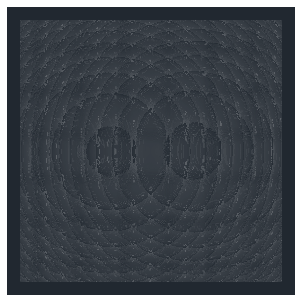

In [20]:
mask = DXF_mask_hatch(filename="240228 isom 2 - angela - hatch p1", cutting_dict=cutting_dict)


for i in range(int(len(x))):
    r0 = (x[i],y[i])
    size_square =(w_x[i], w_y[i])
    angle = theta[i]
    mask.rectangle(r0=r0, size= size_square, angle =angle, origin='0')


mask.save(verbose=True)

mask.draw()

In [21]:
mask = DXF_mask_hatch(filename="240228 isom 2 - angela - hatch p2", cutting_dict=cutting_dict)

mask.rectangle(r0=r0_mask, size= size_mask, angle =0, origin='center')
for i in range(len(x)):

    r0 = (x[i],y[i])
    size_square =(w_x[i], w_y[i])
    angle = theta[i]
    mask.rectangle(r0=r0, size= size_square, angle =angle, origin='0')




In [23]:

mask.save(verbose=True)



filename = 240228 isom 2 - angela - hatch p2.dxf


240228 isom 2 - angela - hatch p2.png


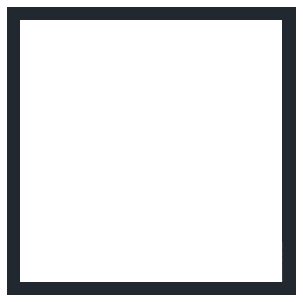

In [14]:
mask.draw()

In [15]:
mask = DXF_mask_hatch(filename="240228 isom 2 - angela - test", cutting_dict=cutting_dict)
mask.rectangle(r0=r0_mask, size= size_mask, angle =0, origin='center')

In [16]:
mask.save(verbose=True)

filename = 240228 isom 2 - angela - test.dxf


240228 isom 2 - angela - test.png


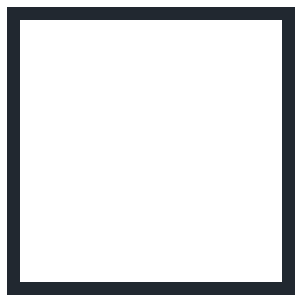

In [17]:
mask.draw()


In [18]:
mask2 = DXF_mask_hatch(filename="new hatch", cutting_dict=cutting_dict)
mask2.load_dxf("240228 isom 2 - angela - hatch p2.dxf")


new hatch.png


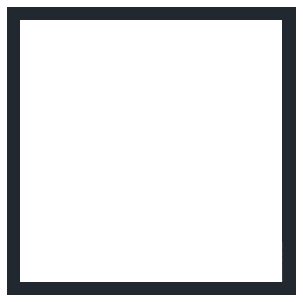

In [19]:
mask2.draw()